In [1]:
import toml
import matplotlib.pyplot as plt
benchmarks=[
    "gf",
            "grover",
            "ham",
            "hhl",
            "qft",
            "vqe"
            ]
import matplotlib.pyplot as plt


In [2]:
voqc_result={}
voqc_result["gf"]= [3435,2695,2.8284859657287598]
voqc_result["grover"]= [8968,6330,9.62699556350708]
voqc_result["ham"]= [1272,890,0.6304950714111328]
voqc_result["hhl"]= [5796,3217,2.169576644897461]
voqc_result["qft"]= [5760,3598,4.221885442733765]
voqc_result["vqe"]= [22374,7629,11.14119267463684]
# old gate, new gate, time

1

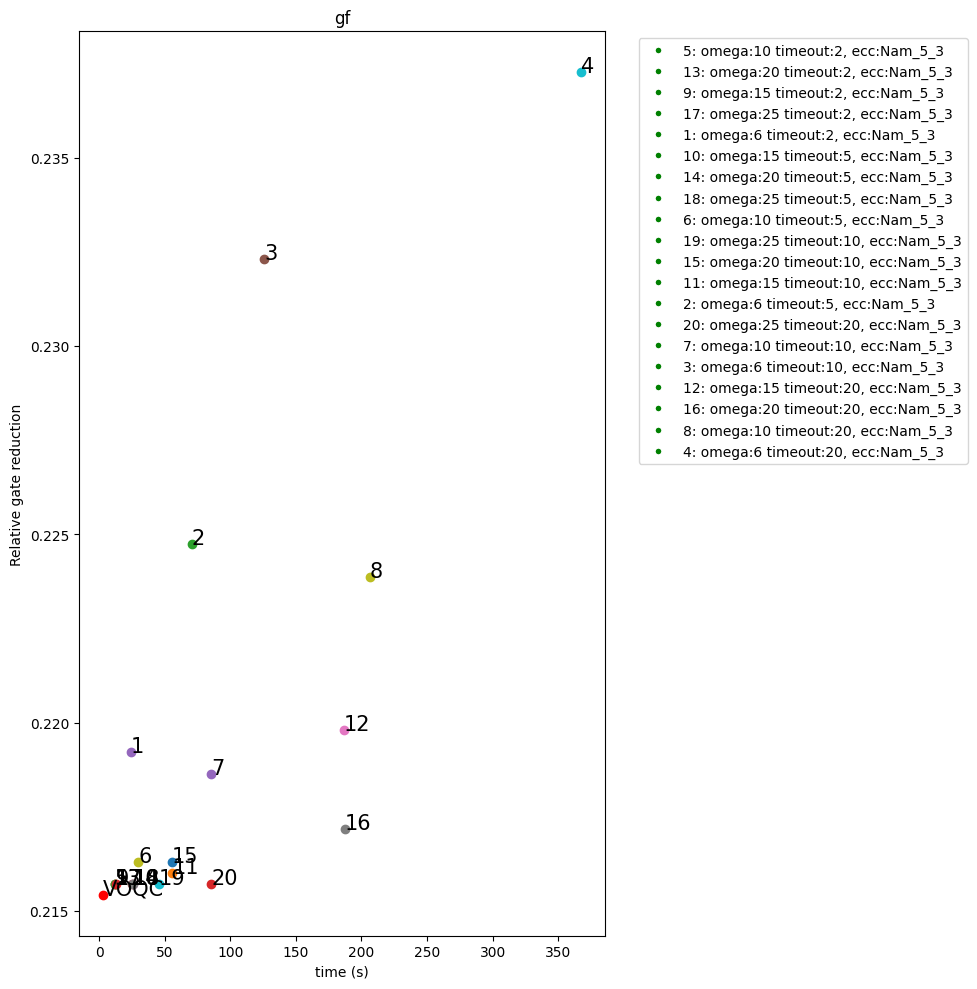

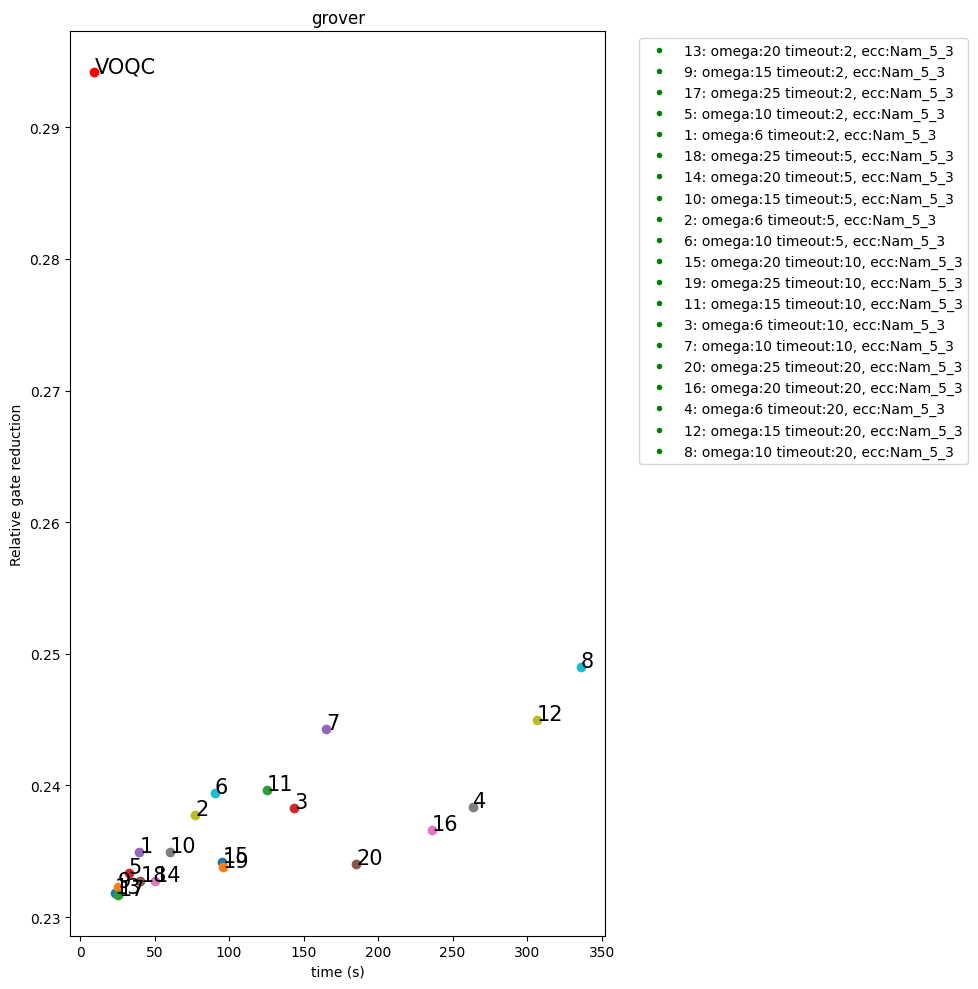

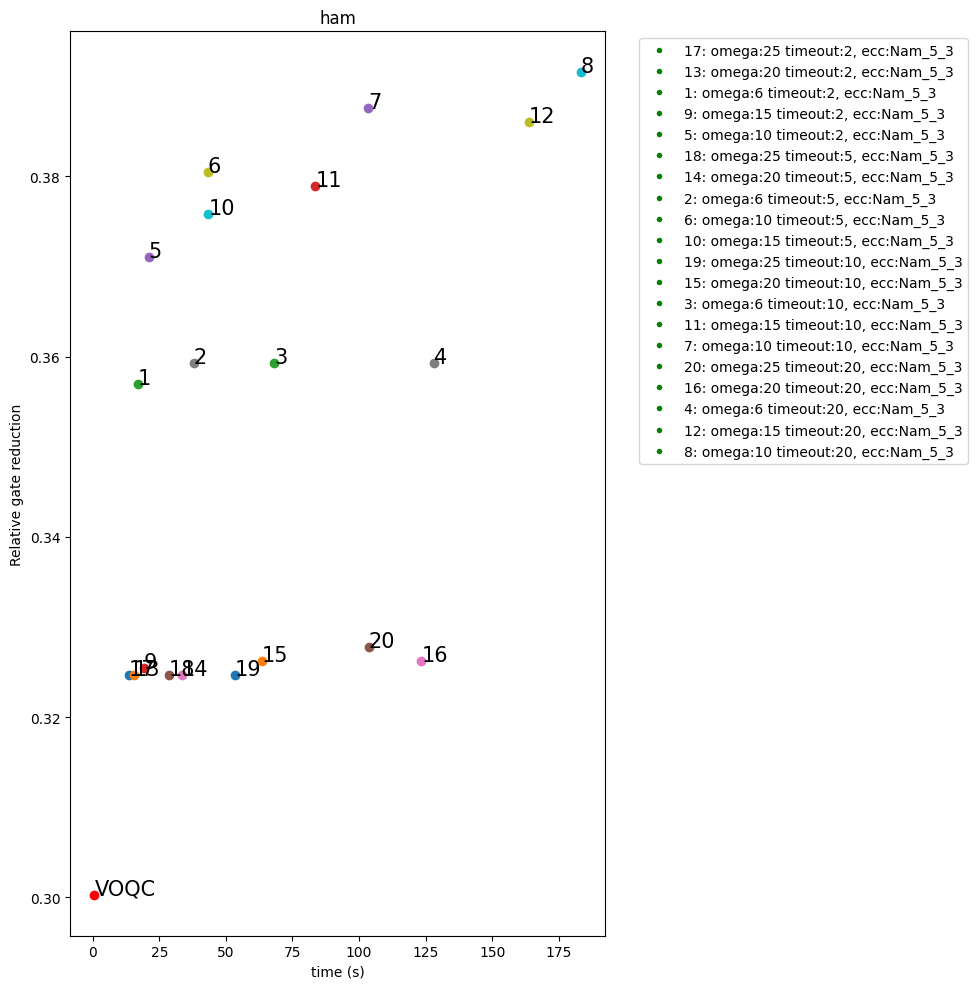

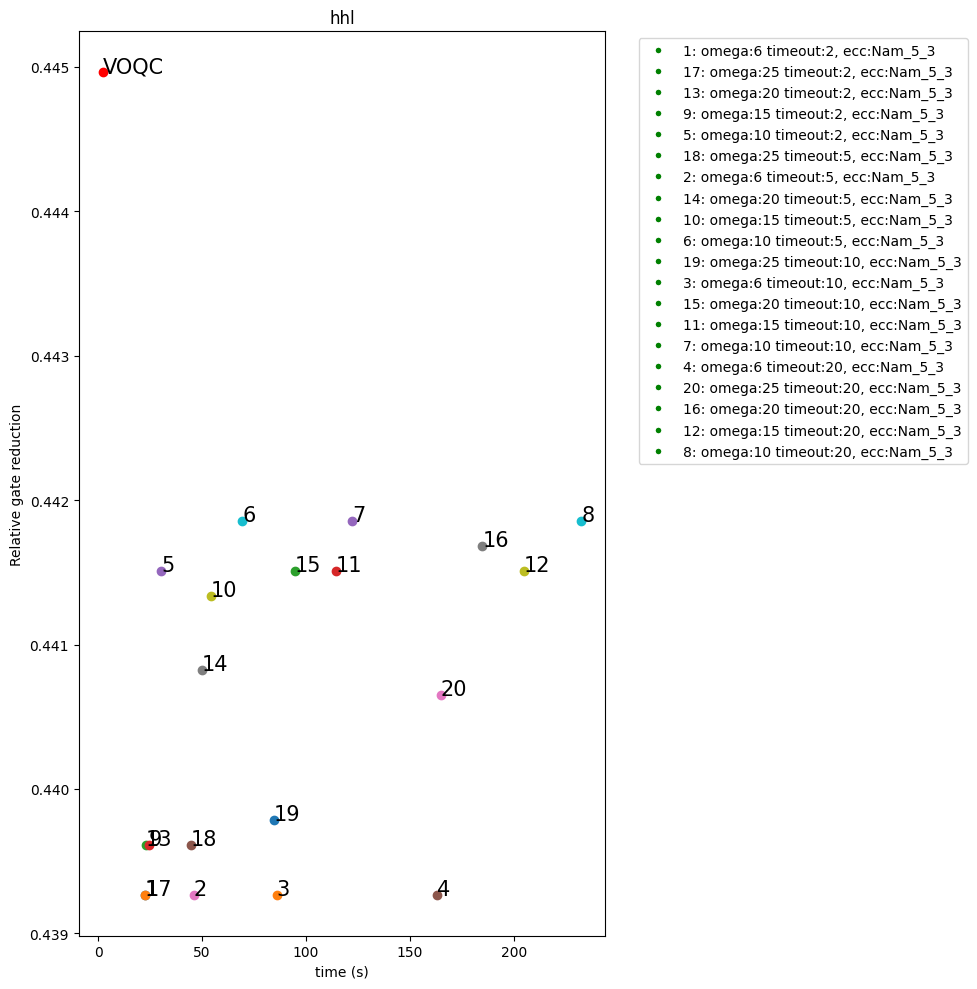

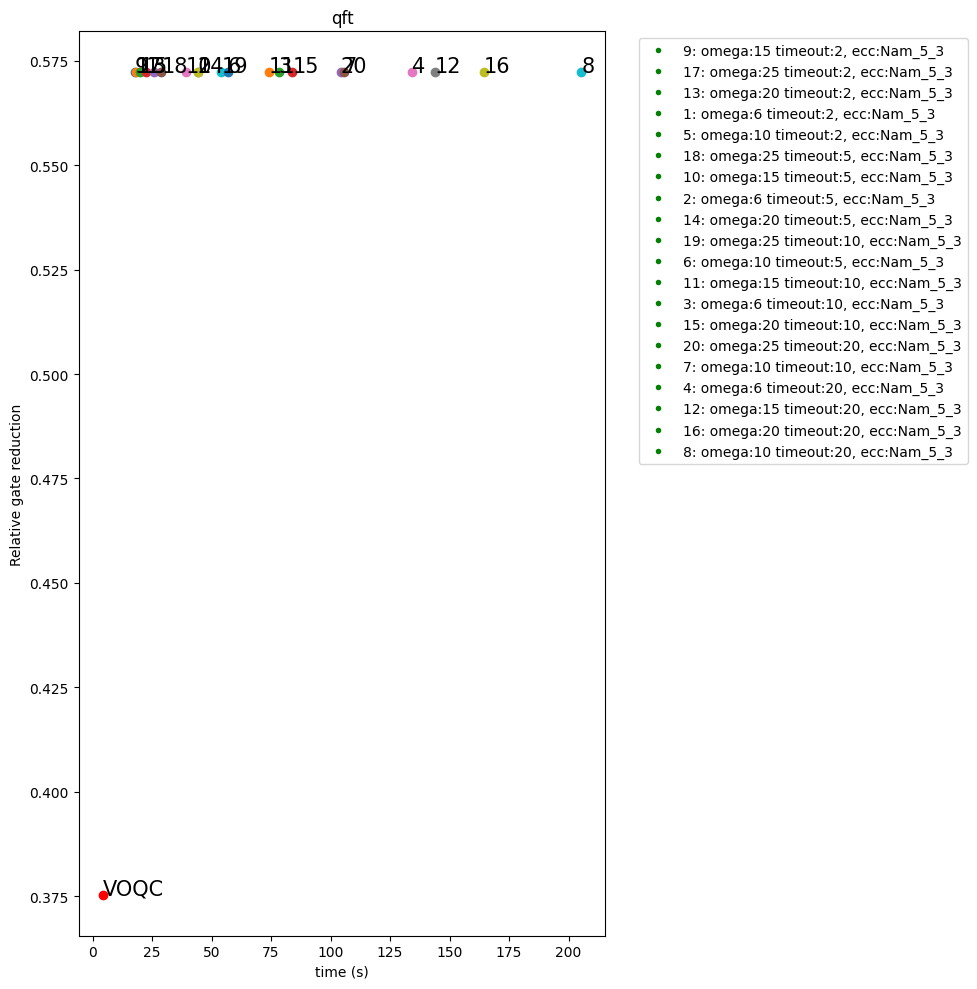

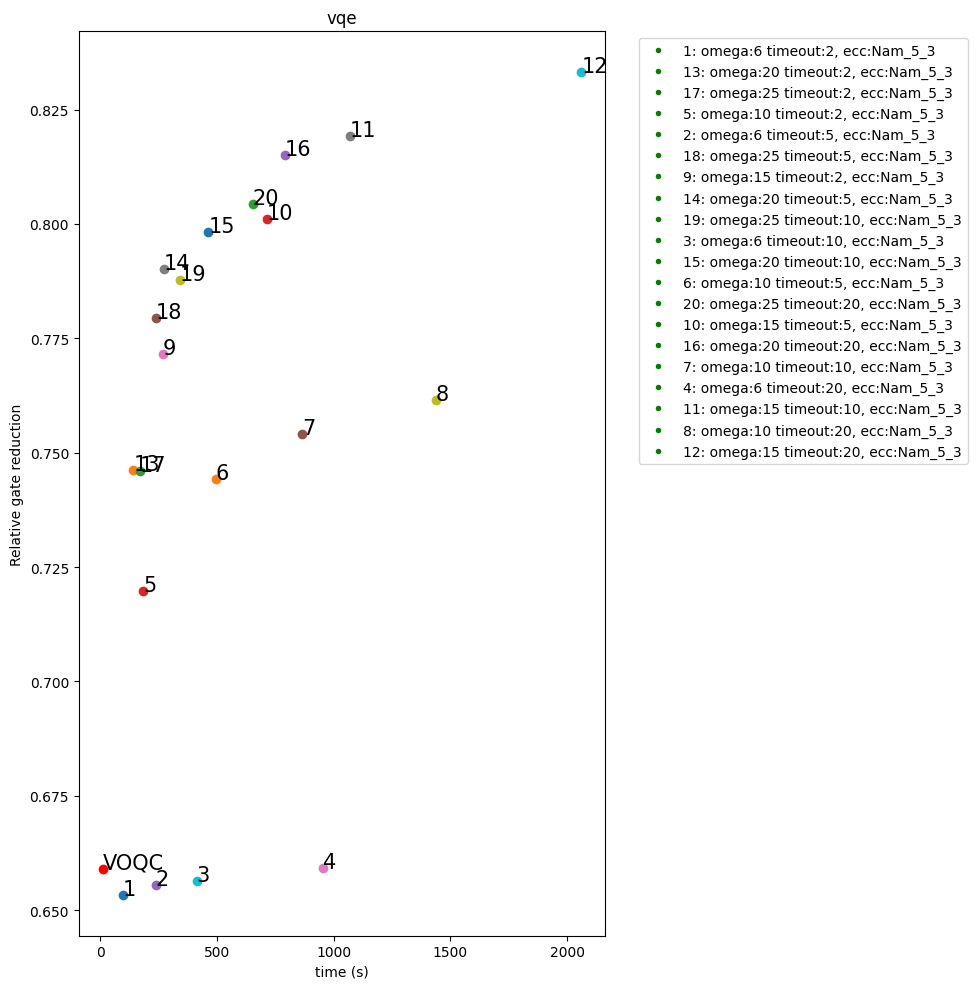

In [7]:
import matplotlib.pyplot as plt
import toml

def pareto_optimal_points(points):
    pareto_points = []
    sorted_points = sorted(points, key=lambda x: x[0])
    for pt in sorted_points:
        pareto_points.append(pt)
    return pareto_points

for benchmark in benchmarks:
    res = toml.load(f"results/Sensitivity/Jatin_{benchmark}.toml")
    points = []
    config_list = []
    for i in res["results"]:
        time = i["result"]["time"]
        reduced_gate_ratio = 1-(i["result"]["old_gates"]-i["result"]["reduced_gates"])/voqc_result[benchmark][0]
        ecc = ""
        if "Nam_5_3" in i["config"]["ecc_path"]:
            ecc = "Nam_5_3"
        elif "Nam_6_3" in i["config"]["ecc_path"]:
            ecc = "Nam_6_3"
        else:
            ecc = "unknown"
        config = f"omega:{i["config"]["omega"]} timeout:{i["config"]["timeout"]}, ecc:{ecc}"
        points.append((time, reduced_gate_ratio))
        config_list.append(config)

    pareto_points = pareto_optimal_points(points)
    pareto_indices = [points.index(pt) for pt in pareto_points]

    fig, ax = plt.subplots(figsize=(10, 10))
    for j in pareto_indices:
        ax.scatter(points[j][0], points[j][1])
        ax.text(points[j][0], points[j][1], str(j+1), fontsize=15)
    ax.scatter(voqc_result[benchmark][2], 1-voqc_result[benchmark][1]/voqc_result[benchmark][0],color="red")
    ax.text(voqc_result[benchmark][2], 1-voqc_result[benchmark][1]/voqc_result[benchmark][0], "VOQC", fontsize=15)
    ax.set_title(label=benchmark)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("Relative gate reduction")

    custom_lines = [plt.Line2D([0], [0], marker='o', color='w', label=str(j+1)+': '+str(config_list[j]),
                               markerfacecolor='g', markersize=5) for j in pareto_indices]
    ax.legend(handles=custom_lines, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(f"{benchmark}_sensitivity.pdf")
1

1

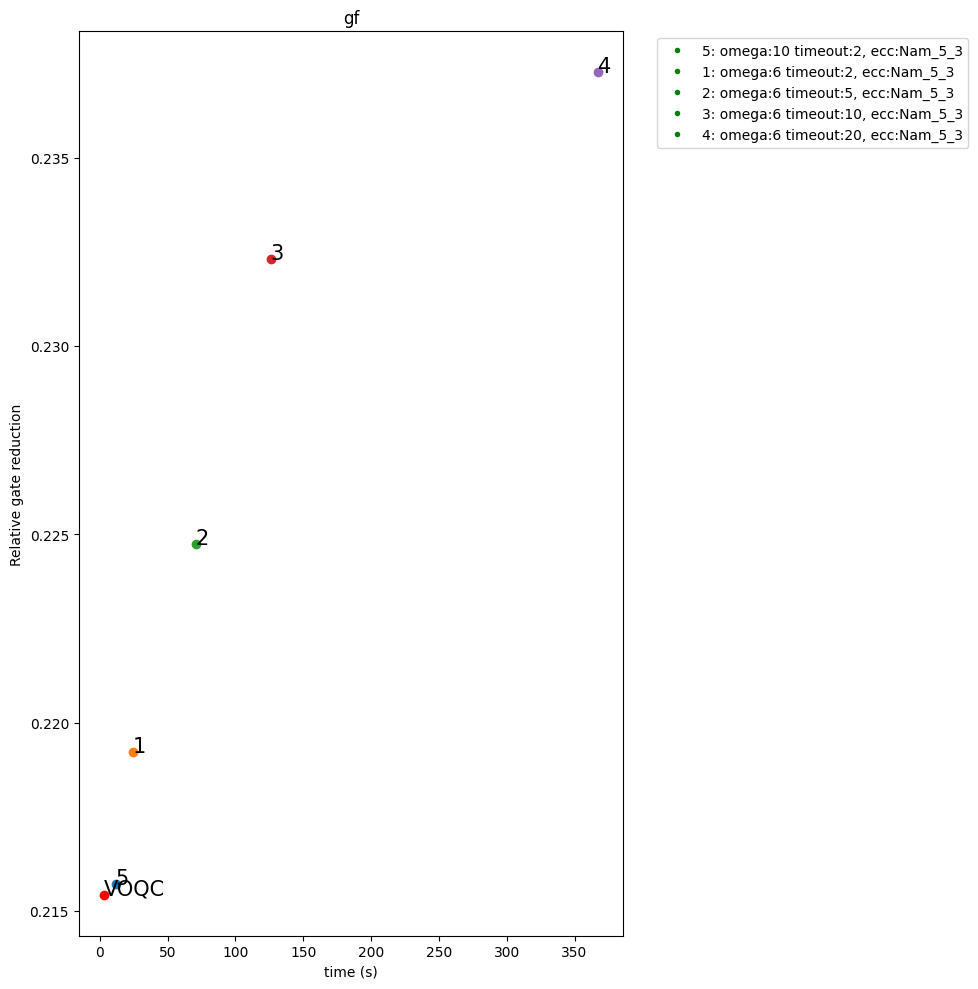

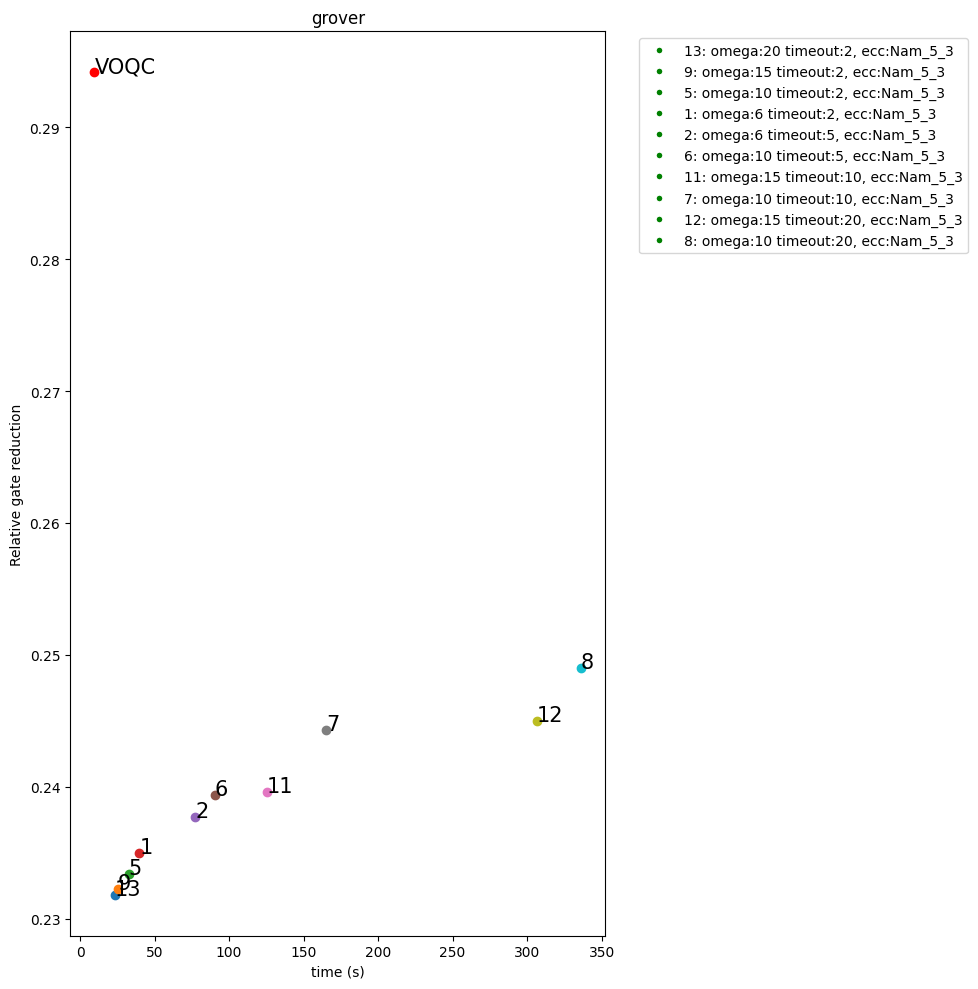

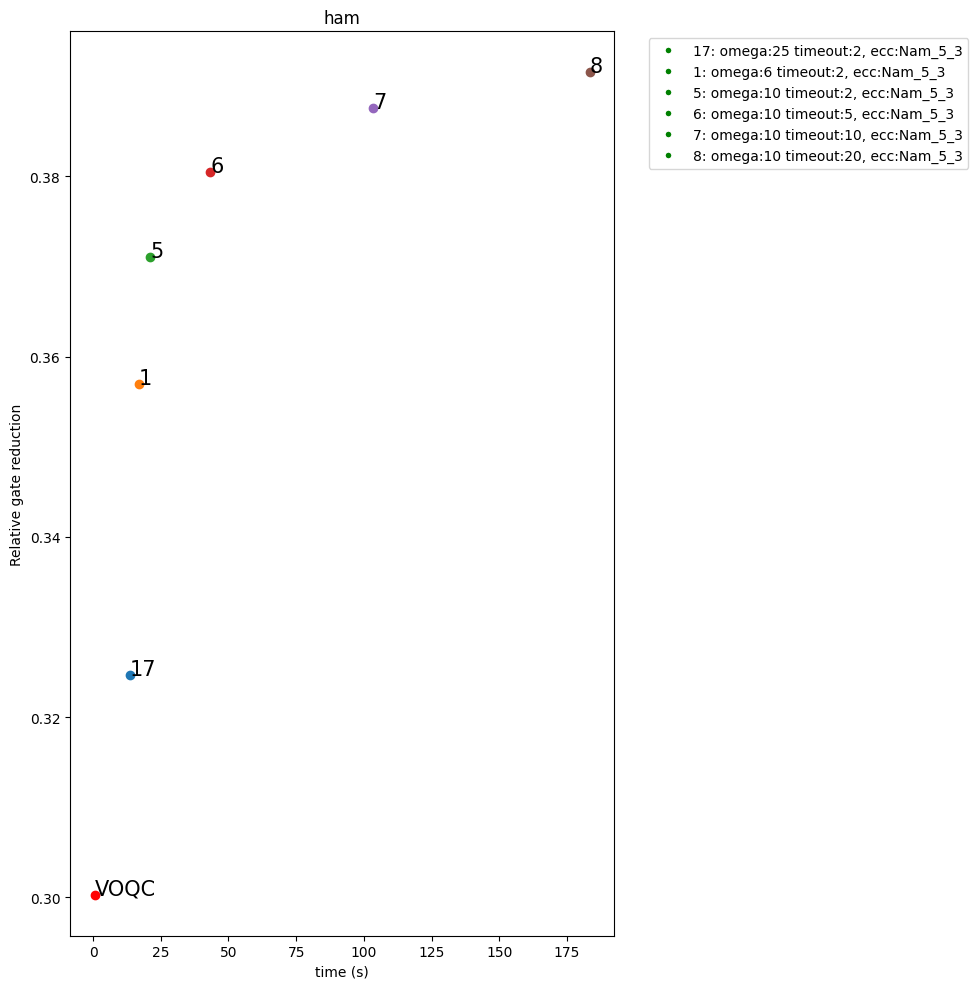

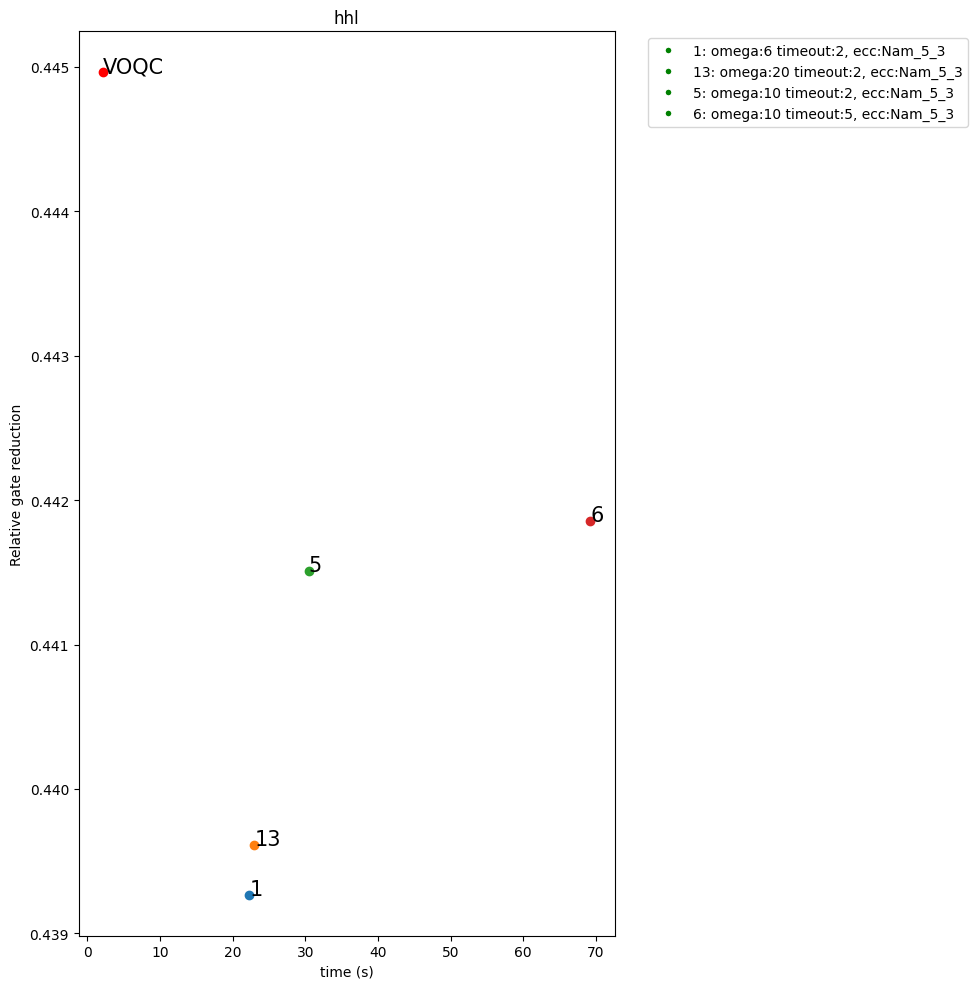

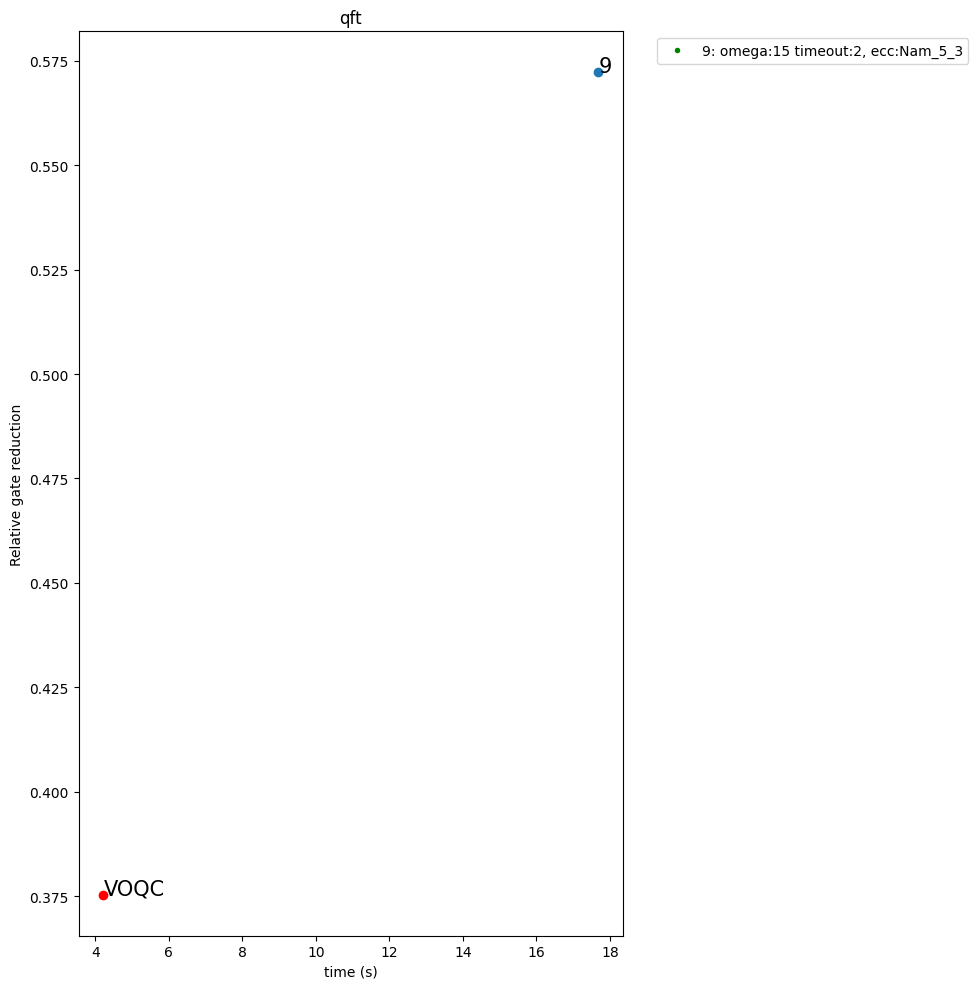

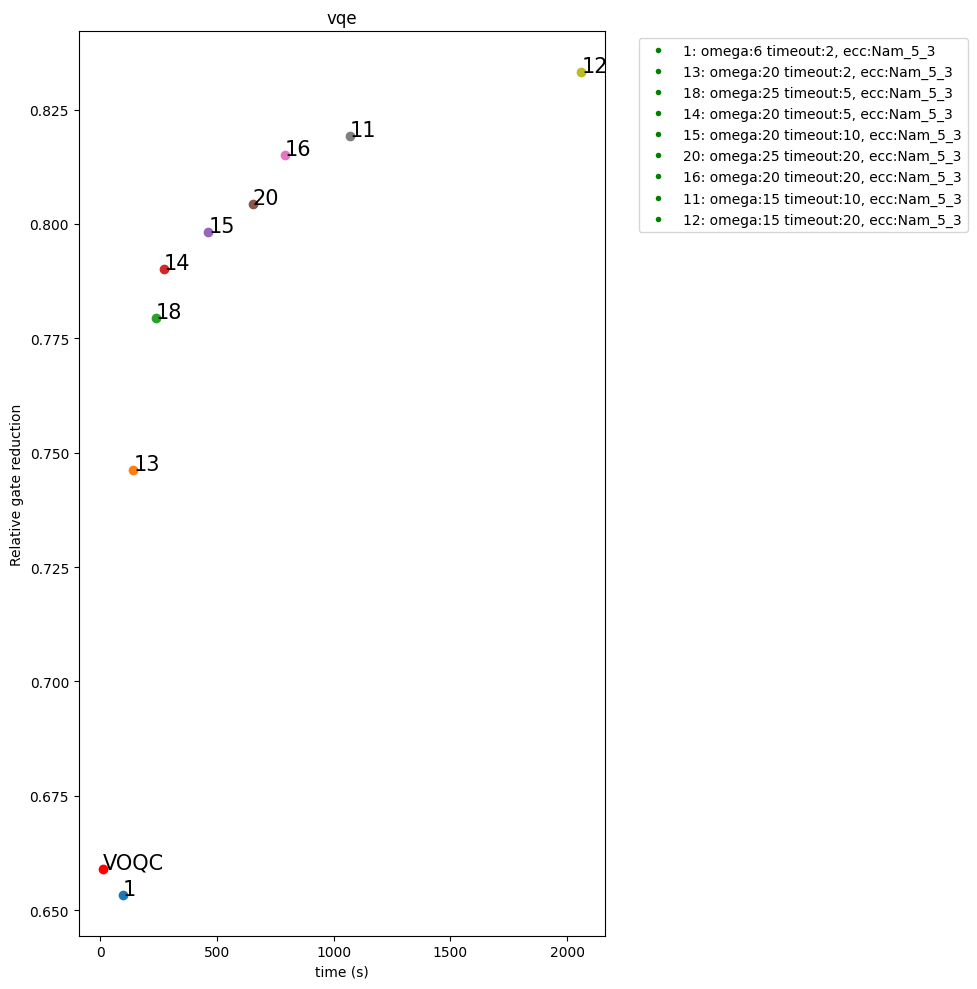

In [8]:
import matplotlib.pyplot as plt
import toml

def pareto_optimal_points(points):
    pareto_points = []
    sorted_points = sorted(points, key=lambda x: x[0])
    max_y = float('-inf')
    for pt in sorted_points:
        if pt[1] > max_y:
            pareto_points.append(pt)
            max_y = pt[1]
    return pareto_points

for benchmark in benchmarks:
    res = toml.load(f"results/Sensitivity/Jatin_{benchmark}.toml")
    points = []
    config_list = []
    for i in res["results"]:
        time = i["result"]["time"]
        reduced_gate_ratio = 1-(i["result"]["old_gates"]-i["result"]["reduced_gates"])/voqc_result[benchmark][0]
        ecc = ""
        if "Nam_5_3" in i["config"]["ecc_path"]:
            ecc = "Nam_5_3"
        elif "Nam_6_3" in i["config"]["ecc_path"]:
            ecc = "Nam_6_3"
        else:
            ecc = "unknown"
        config = f"omega:{i["config"]["omega"]} timeout:{i["config"]["timeout"]}, ecc:{ecc}"
        points.append((time, reduced_gate_ratio))
        config_list.append(config)

    pareto_points = pareto_optimal_points(points)
    pareto_indices = [points.index(pt) for pt in pareto_points]

    fig, ax = plt.subplots(figsize=(10, 10))
    for j in pareto_indices:
        ax.scatter(points[j][0], points[j][1])
        ax.text(points[j][0], points[j][1], str(j+1), fontsize=15)
    ax.scatter(voqc_result[benchmark][2], 1-voqc_result[benchmark][1]/voqc_result[benchmark][0],color="red")
    ax.text(voqc_result[benchmark][2], 1-voqc_result[benchmark][1]/voqc_result[benchmark][0], "VOQC", fontsize=15)
    ax.set_title(label=benchmark)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("Relative gate reduction")

    custom_lines = [plt.Line2D([0], [0], marker='o', color='w', label=str(j+1)+': '+str(config_list[j]),
                               markerfacecolor='g', markersize=5) for j in pareto_indices]
    ax.legend(handles=custom_lines, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(f"{benchmark}_sensitivity_Pareto.pdf")
1